<a href="https://colab.research.google.com/github/bdfd/Project_05-House_Price_Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Startup Profit Prediction

## Basic Approach

The Background Introduction  
Churn is a one of the biggest problem in  the telecom industry. Research has shown that the average monthly churn rate among the top 4 wireless carriers in the US is 1.9% - 2%.   

The Approach  
1. Perform some quick EDA(Exploratory Data Analysis)
2. Use Scikit-Learn Regression/Classification Algorithm
3. Covert data into an array
4. Predicting the target variable 

Prediction Used Model:
  *   1. Multivariate Linear Regression 

Target Cluster Datasets is about a set of data regarding about profit based on  following fields.  

Analyze information  
1 binary features: gender  
7 non-binary categorical features: cnt_children, name_income_type,name_education_type, name_family_status, name_housing_type, occupation_type, cnt_fam_members  
3 continuous features: amt_income_type, days_birth, days_employed  
1 constant feature: flag_mobil  
1 possible drop feature: UserID
1 target variable: Purchased

In [1]:
!pip install table-nan-val
!pip install execdata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import table_nan_val as tnv
import execdata as exe

In [3]:
# Import necessary packages
import os 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, plot_confusion_matrix

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [11]:
# Alternative of Reading the dataset
# pwd = os.getcwd()
# data_dir = os.path.join(pwd, '50_Startups.csv')
# df = pd.read_csv(data_dir, encoding = 'utf-8')

# Read the dataset
data_dir = 'https://raw.githubusercontent.com/bdfd/Project_05-House_Price_Prediction/main/display%20demo'
dataset_1 = 'train.csv'
dataset_2 = 'test.csv'
# Upload dataset into data frame
df_train = pd.read_csv(os.path.join(data_dir,dataset_1), encoding = 'utf-8')
df_test = pd.read_csv(os.path.join(data_dir,dataset_2), encoding = 'utf-8')
df_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [8]:
print(f'the dataset_1 size is {df_train.shape} and dataset_2 size is {df_test.shape}')

the dataset_1 size is (1460, 81) and dataset_2 size is (1459, 80)


In [12]:
# Check column name and categories
df_train.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [13]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [17]:
# Find any missing or null value
df_train.info()
# df_train.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Your selected dataframe has 81 columns.
There are 19 columns that have missing values.


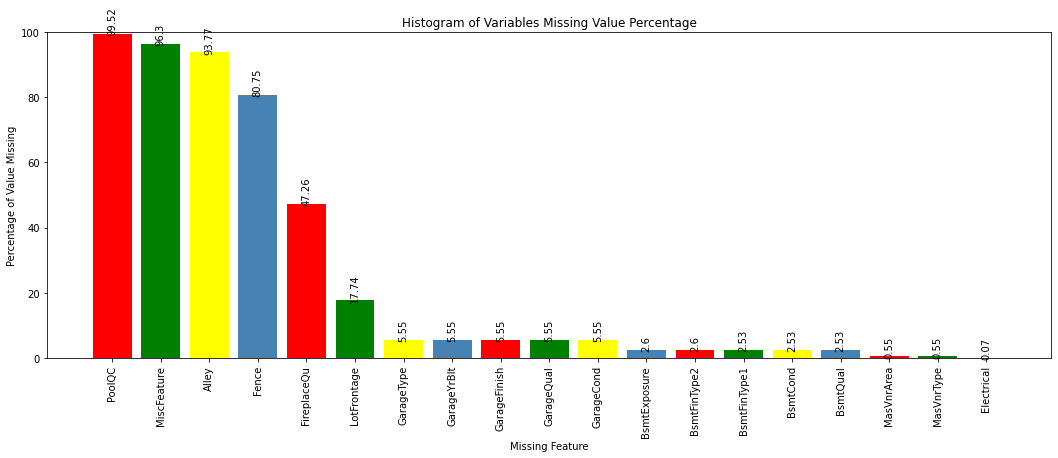

,index,Miss_Values,Miss_Rate,Available_Value
16,PoolQC,1453,99.52,7
18,MiscFeature,1406,96.30,54
1,Alley,1369,93.77,91
17,Fence,1179,80.75,281
10,FireplaceQu,690,47.26,770
0,LotFrontage,259,17.74,1201
11,GarageType,81,5.55,1379
12,GarageYrBlt,81,5.55,1379
13,GarageFinish,81,5.55,1379
14,GarageQual,81,5.55,1379


In [18]:
tnv.Missing_Value_Analysis(df_train)

In [19]:
print(f'Duplicates in this dataset frame: {df_train.iloc[:,1:].duplicated().sum()}, ({np.round(100*df_train.iloc[:,1:].duplicated().sum()/len(df_train),1)}%)')
print('')

Duplicates in this dataset frame: 0, (0.0%)



In [ ]:
# Varify the data type match with corresponding columns types
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

New York      17
California    17
Florida       16
Name: State, dtype: int64


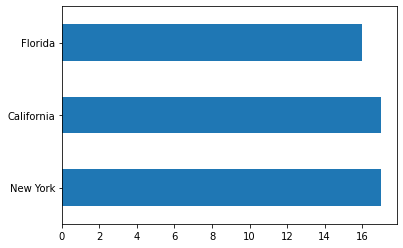

In [ ]:
print(df['State'].value_counts())
df['State'].value_counts().plot(kind='barh')
# df['State'].value_counts().plot(kind='bar')

In [ ]:
# Analyze the cardinality of features
# array(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'],dtype=object)
# Number of float type[constant, continous], categorical type[binary, non-binary]
# 2 binary categorical features: Gender
# 2 continuous features: Age, EstimatedSalary
# 1 possible drop features: User ID
# Target Variable: Purchased(Binary Categorical Features)

In [ ]:
# Drop duplicates
# df=df.drop_duplicates(subset=df.columns[1:], keep='first')

In [ ]:
# Alternative Choice - drop the rows with NA value or NA target variables
# drop Null small amount in the datasets
df = df.dropna(axis=0)
print(df.shape)
# we also drop the XXL record since we dont have a representative amount of this data
df = df[df['size'] != 'XXL']
print(df.shape)

In [ ]:
# Fill missing values
# df['Column_Name'].fillna(value='Other', inplace=True)

In [ ]:
# X = df.iloc[:,1:-1] # X value contains all the variables except labels -only if the prediction column is last one
# y = df.iloc[:,-1] # these are the labels
df_train, df_test = exe.split(df)
# rewrite the target variable
target_variable = 'target variable name'
X_train, y_train, X_test, y_test = exe.sep(df_train, df_test, target_variable)
# we create the test train split first


In [ ]:
# pd.DataFrame(X_train).to_csv('train_x.csv')
# pd.DataFrame(X_test).to_csv('test_x.csv')
# pd.DataFrame(y_train).to_csv('train_y.csv')
# pd.DataFrame(y_test).to_csv('test_y.csv')

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

NameError: ignored

In [ ]:
knn_cm = confusion_matrix(y_test, y_pred)
print(knn_cm)

NameError: ignored

In [ ]:
KNeighborsClassifier().get_params()

NameError: ignored

In [ ]:
# from sklearn.model_selection import GridSearchCV
k_range = range(1,31)
print(k_range)
weight_factor = ('uniform','distance')
param_grid = dict(n_neighbors=k_range, weights=weight_factor)
param_grid

range(1, 31)


{'n_neighbors': range(1, 31), 'weights': ('uniform', 'distance')}

In [ ]:
knn_grid_model = GridSearchCV(knn_model, param_grid, cv=10, scoring='accuracy')

NameError: ignored

In [ ]:
knn_grid_model.fit(X_train, y_train)
knn_grid_model.best_params_
knn_grid_model.best_score_

NameError: ignored

In [ ]:
rf_model = knn_grid_model.best_estimator_
rf_model 

In [ ]:
df = pd.DataFrame(knn_grid_model.cv_results_)
df = df.sort_values(['rank_test_score','mean_fit_time'])
df

In [ ]:
# from sklearn.model_selection import cross_val_score
score1 = cross_val_score(model,X_train, y_train, cv=5)
print("训练集上的平均精准度：%0.2f（+/-%0.2f）" % (score1.mean(),score1.std()*2))